In [2]:
# List of imports

import networkx as nx
import numpy as np
import pickle
from pathlib import Path
import os
import torch
import time
import dgl

import WLColorRefinement as wl
import CSL_data
from data.molecules import MoleculeDataset
from data.superpixels import SuperPixDataset
from data.superpixels import SuperPixDatasetDGL
from data.TUs import TUsDataset
from data.TSP import TSPDataset
from data.COLLAB import COLLABDataset
from data.SBMs import SBMsDataset

import create_reduced_graph as crg
import analyse_reduction as ar

Using backend: pytorch


# Reducing the ZINC train dataset

In [2]:
"""
    Get ZINC graphs
"""
ZINC_graphs = MoleculeDataset('ZINC')

[I] Loading dataset ZINC...
train, test, val sizes : 10000 1000 1000
[I] Finished loading.
[I] Data load time: 9.6226s


In [3]:
"""
    Send the ZINC graphs to the coloring function
"""
ZINC_colored_graphs = list()

for graph in ZINC_graphs.train:
    ZINC_colored_graphs.append(wl.wl_coloring(graph.__getitem__(0)))

In [4]:
"""
    Get ZINC reduced graphs
"""
ZINC_reduced_graphs = crg.reduced_graph(ZINC_colored_graphs)

In [5]:
"""
    Save the ZINC colored and reduced graphs 
"""
os.chdir('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\molecules')

with open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\molecules\\ZINC_train_colored.pkl','wb') as f:
            pickle.dump([ZINC_colored_graphs],f)
with open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\molecules\\ZINC_train_reduced.pkl','wb') as f:
            pickle.dump([ZINC_reduced_graphs],f)
        
os.chdir('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement')

# Reducing the CSL train dataset

In [ ]:
"""
    Get CSL graphs
"""
CSL_graphs = CSL_data.get_CSL_graphs()


In [ ]:
"""
    Send the CSL graphs to the coloring function
"""
CSL_colored_graphs = list()

for i in CSL_graphs:
    CSL_colored_graphs.append(wl.wl_coloring(i))

# Reducing the TU train dataset

In [ ]:
"""
    Get TU graphs
"""
Collab_graph = COLLABDataset('OGBL-COLLAB').graph
ENZYMES_graphs = TUsDataset('ENZYMES')
DD_graphs = TUsDataset('DD')
PROTEINS_full_graphs= TUsDataset('PROTEINS_full')

In [ ]:
"""
    Send the TU graphs to the coloring function
"""
PROTEIN_colored_graphs = list()
for graph in PROTEINS_full_graphs.train:
    PROTEIN_colored_graphs.append(wl.wl_coloring(graph.__getitem__(0)[0]))

# reducing the MNIST train dataset

In [6]:
"""
    Get MNIST graphs
"""
MNIST_graphs = SuperPixDataset('MNIST')

[I] Loading dataset MNIST...
train, test, val sizes : 55000 5000 10000
[I] Finished loading.
[I] Data load time: 56.5733s


In [ ]:
"""
    Send the MNIST graphs to the coloring function
"""
MNIST_colored_graphs = list()

for graph in MNIST_graphs.train:
    MNIST_colored_graphs.append(wl.wl_coloring(graph.__getitem__(0)))

In [ ]:
"""
    Get MNIST reduced graphs
"""
MNIST_reduced_graphs = crg.reduced_graph(MNIST_colored_graphs)

In [ ]:
"""
    Save the MNIST colored and reduced graphs 
"""
os.chdir('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\superpixels')

with open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\superpixels\\MNIST_train_reduced.pkl','wb') as f:
            pickle.dump([MNIST_colored_graphs],f)
        
with open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\superpixels\\MNIST_train_reduced.pkl','wb') as f:
            pickle.dump([MNIST_reduced_graphs],f)
        
os.chdir('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement')

In [ ]:
store_reduction_data('CompressionMNIST.csv', MNIST_graphs, MNIST_reduced_graphs[0])
create_scatter_plot(pd.read_csv (r'CompressionMNIST.csv'))

# Reducing the CIFAR10 train dataset

In [2]:
"""
    Get CIFAR10 graphs
"""
CIFAR10_graphs = SuperPixDataset('CIFAR10')

[I] Loading dataset CIFAR10...
train, test, val sizes : 45000 10000 10000
[I] Finished loading.
[I] Data load time: 46.3957s


In [ ]:
"""
    Send the CIFAR10 graphs to the coloring function
"""
CIFAR10_colored_graphs = list()

for graph in CIFAR10_graphs.train:
    CIFAR10_colored_graphs.append(wl.wl_coloring(graph.__getitem__(0)))

In [ ]:
"""
    Get CIFAR10 reduced graphs
"""
CIFAR10_reduced_graphs = crg.reduced_graph(CIFAR10_colored_graphs)


In [ ]:
"""
    Save the CIFAR10 colored and reduced graphs 
"""
os.chdir('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\SBMs')
   
with open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\superpixels\\CIFAR10_train_reduced.pkl',"rb") as f:
    pickle.dump([CIFAR10_colored_graphs], f)
    
with open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\superpixels\\CIFAR10_train_reduced.pkl',"rb") as f:
    pickle.dump([CIFAR10_reduced_graphs], f)

os.chdir('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement')

In [ ]:
store_reduction_data('CompressionPATTERN.csv', SBM_PATTERN_graphs, PATTERN_reduced_graphs)
create_scatter_plot(pd.read_csv(r'CompressionPATTERN.csv'))

# Reducing the SBM train dataset

In [3]:
"""
    Get SBM graphs
"""
class DotDict(dict):
    def __init__(self, **kwds):
        self.update(kwds)
        self.__dict__ = self
        
SBM_CLUSTER_graphs = SBMsDataset('SBM_CLUSTER')

SBM_PATTERN_graphs = SBMsDataset('SBM_PATTERN')

[I] Loading dataset SBM_CLUSTER...
train, test, val sizes : 10000 1000 1000
[I] Finished loading.
[I] Data load time: 38.8287s
[I] Loading dataset SBM_PATTERN...
train, test, val sizes : 10000 2000 2000
[I] Finished loading.
[I] Data load time: 119.3258s


In [4]:
"""
    Send the SBM graphs to the coloring function
"""
SBM_PATTERN_colored_graphs = list()
SBM_CLUSTER_colored_graphs = list()

for graph in SBM_CLUSTER_graphs.train:
    SBM_CLUSTER_colored_graphs.append(wl.wl_coloring(graph.__getitem__(0)))
    
for graph in SBM_PATTERN_graphs.train:
    SBM_PATTERN_colored_graphs.append(wl.wl_coloring(graph.__getitem__(0)))

In [6]:
"""
    Get the SBM reduced graphs
"""
SBM_CLUSTER_reduced_graphs = crg.reduced_graph(SBM_CLUSTER_colored_graphs)
SBM_PATTERN_reduced_graphs = crg.reduced_graph(SBM_PATTERN_colored_graphs)

In [ ]:
"""
    Save the SBM colored and reduced graphs 
"""
os.chdir('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\SBMs')

with open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\SBMs\\PATTERN_train_colored.pkl','wb') as f:
            pickle.dump([SBM_PATTERN_colored_graphs],f)
        
with open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\SBMs\\PATTERN_train_colored.pkl','wb') as f:
            pickle.dump([SBM_PATTERN_reduced_graphs],f)

        
with open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\SBMs\\CLUSTER_train_colored.pkl','wb') as f:
            pickle.dump([SBM_CLUSTER_colored_graphs],f)
        
with open('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement\\data\\SBMs\\CLUSTER_train_reduced.pkl','wb') as f:
            pickle.dump([SBM_CLUSTER_reduced_graphs],f)

os.chdir('C:\\Users\\User1\\Documents\\GitHub\\ResearchProject1\\WLColorRefinement')

In [11]:
import csv
import pandas as pd
import matplotlib.pyplot as plt

def store_reduction_data(file, original_graphs, reduced_graphs):
    i = 0
    
    with open(file, mode='w') as csv_file:
        writer = csv.writer(csv_file)
        fieldnames = ['Graph nr', 
                      'Original nodes', 'Reduced nodes', 'Node compr. rate', 
                      'Original edges', 'Reduced edges', 'Edge compr. rate'
                     ]
        writer = csv.writer(csv_file)
        writer.writerow(fieldnames)

        while i < len(reduced_graphs):
#             print('Graph ', i)
            x = original_graphs.train.__getitem__(i)[0]
            y = reduced_graphs[i]
#             nx_x = x.to_networkx()
#             nx_y = y.to_networkx()
#             pos_x = nx.kamada_kawai_layout(nx_x)
#             pos_y = nx.kamada_kawai_layout(nx_y)

            writer.writerow([i,x.number_of_nodes(), 
                             y.number_of_nodes(), 
                             round((((x.number_of_nodes() - y.number_of_nodes())/x.number_of_nodes())*100),2),
                             x.number_of_edges(), 
                             y.number_of_edges(),
                             round((((x.number_of_edges() - y.number_of_edges())/x.number_of_edges())*100),2)
                            ])

            i += 1
            
            
def create_scatter_plot(df):
    print('Analysis')
    print('\n')
    
    node = df[df.columns[3]]
    edge = df[df.columns[6]]

    plt.scatter(node, edge, s = 1)
    plt.show()
    
#     edge.plot.hist(grid=True, bins=20, rwidth=0.9)
#     node.plot.hist(grid=True, bins=20, rwidth=0.9)
    
#     i = 0
#     count_node = {"<=10":0,
#             "<=20":0,
#             "<=30":0,
#             "<=40":0,
#             "<=50":0,
#             "<=60":0,
#             "<=70":0,
#             "<=80":0,
#             "<=90":0,
#             "<=100":0
#             }
    
#     count_edge = {"<=10":0,
#             "<=20":0,
#             "<=30":0,
#             "<=40":0,
#             "<=50":0,
#             "<=60":0,
#             "<=70":0,
#             "<=80":0,
#             "<=90":0,
#             "<=100":0
#             }
#     while i < len(node):
#         if node[i] <= 10:
#             count_node["<=10"] += 1
#         elif node[i] <= 20:
#             count_node["<=20"] += 1
#         elif node[i] <= 30:
#             count_node["<=30"] += 1
#         elif node[i] <= 40:
#             count_node["<=40"] += 1
#         elif node[i] <= 50:
#             count_node["<=50"] += 1
#         elif node[i] <= 60:
#             count_node["<=60"] += 1
#         elif node[i] <= 70:
#             count_node["<=70"] += 1
#         elif node[i] <= 80:
#             count_node["<=80"] += 1
#         elif node[i] <= 90:
#             count_node["<=90"] += 1
#         elif node[i] <= 100:
#             count_node["<=100"] += 1
#         i += 1
#     i = 0
#     while i < len(edge):
#         print
#         if edge[i] <= 10:
#             count_edge["<=10"] += 1
#         elif edge[i] <= 20:
#             count_edge["<=20"] += 1
#         elif edge[i] <= 30:
#             count_edge["<=30"] += 1
#         elif edge[i] <= 40:
#             count_edge["<=40"] += 1
#         elif edge[i] <= 50:
#             count_edge["<=50"] += 1
#         elif edge[i] <= 60:
#             count_edge["<=60"] += 1
#         elif edge[i] <= 70:
#             count_edge["<=70"] += 1
#         elif edge[i] <= 80:
#             count_edge["<=80"] += 1
#         elif edge[i] <= 90:
#             count_edge["<=90"] += 1
#         elif edge[i] <= 100:
#             count_edge["<=100"] += 1
#         i += 1
#     print('nodes reduction\n', count_node)
#     print('edges reduction\n', count_edge)

In [ ]:
store_reduction_data('CompressionMNIST.csv', MNIST_graphs, MNIST_reduced_graphs[0])
analyse_data(pd.read_csv (r'CompressionMNIST.csv'))

Analysis




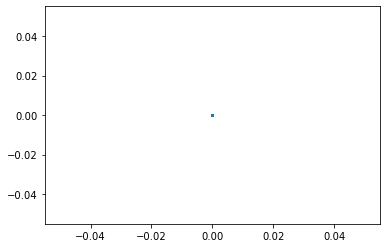

In [12]:
store_reduction_data('CompressionPATTERN2.csv', SBM_PATTERN_graphs, SBM_PATTERN_reduced_graphs)
create_scatter_plot(pd.read_csv (r'CompressionPATTERN2.csv'))

Analysis




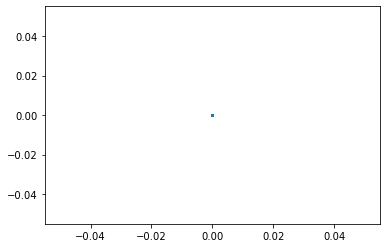

In [13]:
store_reduction_data('CompressionCLUSTER2.csv', SBM_CLUSTER_graphs, SBM_CLUSTER_reduced_graphs)
create_scatter_plot(pd.read_csv (r'CompressionCLUSTER2.csv'))

In [ ]:
# store_reduction_data('CompressionMolecules.csv', ZINC_graphs, ZINC_reduced_graphs)
# analyse_data(pd.read_csv (r'CompressionMolecules.csv'))

# store_reduction_data('CompressionCIFAR10.csv', CIFAR10_graphs, CIFAR10_reduced_graphs)
# analyse_data(pd.read_csv (r'CompressionCIFAR10.csv'))